# Import Library

In [ ]:
import pandas as pd # package for high-performance, easy-to-use data structures and data analysis
import numpy as np # fundamental package for scientific computing with Python
import matplotlib
import matplotlib.pyplot as plt # for plotting
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
import plotly.offline as py
py.init_notebook_mode(connected=True)
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.offline as offline
offline.init_notebook_mode()
from plotly import tools
# import plotly.tools as tls
# import squarify
# from mpl_toolkits.basemap import Basemap
# from numpy import array
# from matplotlib import cm

# import cufflinks and offline mode
import cufflinks as cf
cf.go_offline()

# from sklearn import preprocessing
# # Supress unnecessary warnings so that presentation looks clean
# import warnings
# warnings.filterwarnings("ignore")

# # Print all rows and columns
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

In [ ]:
from plotly.offline import init_notebook_mode, iplot
from wordcloud import WordCloud
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from plotly import tools
from datetime import date
import pandas as pd
import numpy as np
import seaborn as sns
import random
import warnings
warnings.filterwarnings("ignore")
init_notebook_mode(connected=True)

In [ ]:
# connect google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Import data

In [ ]:
merged_credit = pd.read_csv("/content/gdrive/MyDrive/Kiến tập - Data/2. Dataset/HomeCredit/merged_credit.csv")
merged_credit.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100006       0         Cash loans           F            N   
1      100006       0         Cash loans           F            N   
2      100006       0         Cash loans           F            N   
3      100011       0         Cash loans           F            N   
4      100011       0         Cash loans           F            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          135000.0    312682.5      29686.5   
1               Y             0          135000.0    312682.5      29686.5   
2               Y             0          135000.0    312682.5      29686.5   
3               Y             0          112500.0   1019610.0      33826.5   
4               Y             0          112500.0   1019610.0      33826.5   

   ...  AMT_RECIVABLE AMT_TOTAL_RECEIVABLE CNT_DRAWINGS_ATM_CURRENT  \
0  ...           0.00                 0.00                      NaN   
1  ...           0.00                 0.00                      NaN   
2  ...           0.00                 0.00                      NaN   
3  ...       75109.95             75109.95                      0.0   
4  ...           0.00                 0.00                      0.0   

  CNT_DRAWINGS_CURRENT CNT_DRAWINGS_OTHER_CURRENT CNT_DRAWINGS_POS_CURRENT  \
0                    0                        NaN                      NaN   
1                    0                        NaN                      NaN   
2                    0                        NaN                      NaN   
3                    0                        0.0                      0.0   
4                    0                        0.0                      0.0   

   CNT_INSTALMENT_MATURE_CUM  NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
0                        0.0                Active       0           0  
1                        0.0                Active       0           0  
2                        0.0                Active       0           0  
3                       27.0                Active       0           0  
4                       33.0                Active       0           0  

[5 rows x 144 columns]

In [ ]:
POS_CASH_balance = pd.read_csv("/content/gdrive/MyDrive/Kiến tập - Data/2. Dataset/HomeCredit/POS_CASH_balance.csv")
POS_CASH_balance.head()

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
0     1803195      182943             -31            48.0   
1     1715348      367990             -33            36.0   
2     1784872      397406             -32            12.0   
3     1903291      269225             -35            48.0   
4     2341044      334279             -35            36.0   

   CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
0                   45.0               Active       0           0  
1                   35.0               Active       0           0  
2                    9.0               Active       0           0  
3                   42.0               Active       0           0  
4                   35.0               Active       0           0

In [ ]:
credit_card_balance = pd.read_csv("/content/gdrive/MyDrive/Kiến tập - Data/2. Dataset/HomeCredit/credit_card_balance.csv")
credit_card_balance.head()

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  \
0     2562384      378907              -6       56.970   
1     2582071      363914              -1    63975.555   
2     1740877      371185              -7    31815.225   
3     1389973      337855              -4   236572.110   
4     1891521      126868              -1   453919.455   

   AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT  \
0                   135000                       0.0                 877.5   
1                    45000                    2250.0                2250.0   
2                   450000                       0.0                   0.0   
3                   225000                    2250.0                2250.0   
4                   450000                       0.0               11547.0   

   AMT_DRAWINGS_OTHER_CURRENT  AMT_DRAWINGS_POS_CURRENT  \
0                         0.0                     877.5   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                   11547.0   

   AMT_INST_MIN_REGULARITY  ...  AMT_RECIVABLE  AMT_TOTAL_RECEIVABLE  \
0                 1700.325  ...          0.000                 0.000   
1                 2250.000  ...      64875.555             64875.555   
2                 2250.000  ...      31460.085             31460.085   
3                11795.760  ...     233048.970            233048.970   
4                22924.890  ...     453919.455            453919.455   

   CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  CNT_DRAWINGS_OTHER_CURRENT  \
0                       0.0                     1                         0.0   
1                       1.0                     1                         0.0   
2                       0.0                     0                         0.0   
3                       1.0                     1                         0.0   
4                       0.0                     1                         0.0   

   CNT_DRAWINGS_POS_CURRENT  CNT_INSTALMENT_MATURE_CUM  NAME_CONTRACT_STATUS  \
0                       1.0                       35.0                Active   
1                       0.0                       69.0                Active   
2                       0.0                       30.0                Active   
3                       0.0                       10.0                Active   
4                       1.0                      101.0                Active   

   SK_DPD  SK_DPD_DEF  
0       0           0  
1       0           0  
2       0           0  
3       0           0  
4       0           0  

[5 rows x 23 columns]

In [ ]:
application_train = pd.read_csv("/content/gdrive/MyDrive/Kiến tập - Data/2. Dataset/HomeCredit/application_train.csv")
application_train.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [ ]:
installments_payments = pd.read_csv("/content/drive/MyDrive/Kiến tập - Data/Dataset/HomeCredit/installments_payments.csv")
installments_payments.head()

In [ ]:
previous_application = pd.read_csv("/content/drive/MyDrive/Kiến tập - Data/Dataset/HomeCredit/previous_application.csv")
previous_application.head()

In [ ]:
application_train = pd.read_csv("/content/gdrive/MyDrive/Kiến tập - Data/Dataset/HomeCredit/application_train.csv")
application_train.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

# EDA

##Function

###Identifying Missing Value

In [ ]:
#Identifying Missing Value Present in Application Train Dataset
def missingdata(data):
    total = data.isnull().sum().sort_values(ascending=False)
    percent = (data.isnull().sum() / data.isnull().count() * 100).sort_values(ascending=False)
    ms = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    ms = ms[ms["Percent"] > 0]

    f, ax = plt.subplots(figsize=(15, 10))
    plt.xticks(rotation='vertical')
    fig = sns.barplot(x=ms.index, y=ms["Percent"], color="green", alpha=0.8)

    plt.xlabel('Features', fontsize=15)
    plt.ylabel('Percent of missing values', fontsize=15)
    plt.title('Percent missing data by feature', fontsize=15)

    return ms

###Grab Column Names

In [ ]:
# Grab Column Names
def grab_col_names(dataframe, cat_th=10, car_th=20, show_date=False):
    date_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "datetime64[ns]"]
    cat_cols = dataframe.select_dtypes(["object", "category"]).columns.tolist()

    num_but_cat = [col for col in dataframe.select_dtypes(["float", "integer"]).columns if dataframe[col].nunique() < cat_th]
    cat_but_car = [col for col in dataframe.select_dtypes(["object", "category"]).columns if dataframe[col].nunique() > car_th]

    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    num_cols = dataframe.select_dtypes(["float", "integer"]).columns
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'date_cols: {len(date_cols)}')
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    if show_date == True:
        return date_cols, cat_cols, cat_but_car, num_cols, num_but_cat
    else:
        return cat_cols, cat_but_car, num_cols, num_but_cat


###Categorical Variables & Target

In [ ]:
#Function for find out Numerical and categeical Variables
def type_features(data):
    categorical_features = data.select_dtypes(include = ["object"]).columns
    numerical_features = data.select_dtypes(exclude = ["object"]).columns
    print( "categorical_features :",categorical_features)
    print('-----'*40)
    print("numerical_features:",numerical_features)

In [ ]:
# Categorical Variables & Target
def cat_analyzer(dataframe, variable, target = None):
    print(variable)
    if target == None:
        print(pd.DataFrame({
            "COUNT": dataframe[variable].value_counts(),
            "RATIO": dataframe[variable].value_counts() / len(dataframe)}), end="\n\n\n")
    else:
        temp = dataframe[dataframe[target].isnull() == False]
        print(pd.DataFrame({
            "COUNT":dataframe[variable].value_counts(),
            "RATIO":dataframe[variable].value_counts() / len(dataframe),
            "TARGET_COUNT":dataframe.groupby(variable)[target].count(),
            "TARGET_MEAN":temp.groupby(variable)[target].mean(),
            "TARGET_MEDIAN":temp.groupby(variable)[target].median(),
            "TARGET_STD":temp.groupby(variable)[target].std()}), end="\n\n\n")

###Numerical Variables

In [ ]:
# Numerical Variables
def corr_plot(data, remove=["Id"], corr_coef = "pearson", figsize=(20, 20)):
    if len(remove) > 0:
        num_cols2 = [x for x in data.columns if (x not in remove)]

    sns.set(font_scale=1.1)
    c = data[num_cols2].corr(method = corr_coef)
    mask = np.triu(c.corr(method = corr_coef))
    plt.figure(figsize=figsize)
    sns.heatmap(c,
                annot=True,
                fmt='.1f',
                cmap='coolwarm',
                square=True,
                mask=mask,
                linewidths=1,
                cbar=False)
    plt.show()

###Plot numerical variables

In [ ]:
# Plot numerical variables
def num_plot(data, num_cols, remove=["Id"], hist_bins=10, figsize=(20, 4)):

    if len(remove) > 0:
        num_cols2 = [x for x in num_cols if (x not in remove)]

    for i in num_cols2:
        fig, axes = plt.subplots(1, 3, figsize=figsize)
        data.hist(str(i), bins=hist_bins, ax=axes[0])
        data.boxplot(str(i), ax=axes[1], vert=False);
        try:
            sns.kdeplot(np.array(data[str(i)]))
        except:
            ValueError

        axes[1].set_yticklabels([])
        axes[1].set_yticks([])
        axes[0].set_title(i + " | Histogram")
        axes[1].set_title(i + " | Boxplot")
        axes[2].set_title(i + " | Density")
        plt.show()

### Get high correlated variables

In [ ]:
# Get high correlated variables
def high_correlation(data, remove=['SK_ID_CURR', 'SK_ID_BUREAU'], corr_coef="pearson", corr_value = 0.7):
    if len(remove) > 0:
        cols = [x for x in data.columns if (x not in remove)]
        c = data[cols].corr(method=corr_coef)
    else:
        c = data.corr(method=corr_coef)

    for i in c.columns:
        cr = c.loc[i].loc[(c.loc[i] >= corr_value) | (c.loc[i] <= -corr_value)].drop(i)
        if len(cr) > 0:
            print(i)
            print("-------------------------------")
            print(cr.sort_values(ascending=False))
            print("\n")

###Get data overview

In [ ]:
#count for unique values, missing values, duplicates
def get_data_overview(data):
    # Get column info
    num_data = data.select_dtypes(include=['float64', 'int64'])
    #count num
    num = ['int64', 'float64']
    num_df = data.select_dtypes(include=num)
    num_count= len(num_df.columns)

    cat_data = data.select_dtypes(include=['object'])
    #count cat
    cat = ['object']
    cat_df = data.select_dtypes(include=cat)
    cat_count =len(cat_df.columns)

    #numeric data
    num_info = pd.DataFrame(num_data.dtypes.astype(str), columns=["Data Type"])
    num_info.index.name = "Column Name"
    num_info["No of Unique Values"] = num_data.nunique()
    num_info["No of Missing Values"] = num_data.isnull().sum()
    num_info["% of Missing Values"] = round((num_info["No of Missing Values"] / len(num_data)) * 100, 2)
    num_info["No of Duplicates"] = num_data.duplicated().sum()

    #categorical data
    cat_info = pd.DataFrame(cat_data.dtypes.astype(str), columns=["Data Type"])
    cat_info.index.name = "Column Name"
    cat_info["No of Unique Values"] = cat_data.nunique()
    cat_info["No of Missing Values"] = cat_data.isnull().sum()
    cat_info["% of Missing Values"] = round((cat_info["No of Missing Values"] / len(cat_data)) * 100, 2)

     # Print overview table
    print(f"{'-'*120}\n{'Numeric Columns (' + str(num_count) + ' attributes)':^120}\n{'-'*120}\n{num_info.index.name:20} {'Data Type':10} {'No of Unique Values':20} {'No of Missing Values':20} {'% of Missing Values':20} {'No of Duplicates':20}\n{'-'*120}")
    for i in range(len(num_info)):
        print(f"{num_info.index[i]:20} {str(num_info.iloc[i, 0]):>10} {num_info.iloc[i, 1]:>20} {num_info.iloc[i, 2]:>20} {num_info.iloc[i, 3]:>20} {num_info.iloc[i, 4]:>20}")

    print(f"{'-'*120}\n{'Categorical Columns (' + str(cat_count) + ' attributes)':^120}\n{'-'*120}\n{cat_info.index.name:20} {'Data Type':10} {'No of Unique Values':20} {'No of Missing Values':20} {'% of Missing Values':20} \n{'-'*120}")
    for i in range(len(cat_info)):
        print(f"{cat_info.index[i]:20} {str(cat_info.iloc[i, 0]):>10} {cat_info.iloc[i, 1]:>20} {cat_info.iloc[i, 2]:>20} {cat_info.iloc[i, 3]:>20} ")

## Credit Card Balance

### Snapshot

In [ ]:
credit_card_balance.head()

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  \
0     2562384      378907              -6       56.970   
1     2582071      363914              -1    63975.555   
2     1740877      371185              -7    31815.225   
3     1389973      337855              -4   236572.110   
4     1891521      126868              -1   453919.455   

   AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT  \
0                   135000                       0.0                 877.5   
1                    45000                    2250.0                2250.0   
2                   450000                       0.0                   0.0   
3                   225000                    2250.0                2250.0   
4                   450000                       0.0               11547.0   

   AMT_DRAWINGS_OTHER_CURRENT  AMT_DRAWINGS_POS_CURRENT  \
0                         0.0                     877.5   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                   11547.0   

   AMT_INST_MIN_REGULARITY  ...  AMT_RECIVABLE  AMT_TOTAL_RECEIVABLE  \
0                 1700.325  ...          0.000                 0.000   
1                 2250.000  ...      64875.555             64875.555   
2                 2250.000  ...      31460.085             31460.085   
3                11795.760  ...     233048.970            233048.970   
4                22924.890  ...     453919.455            453919.455   

   CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  CNT_DRAWINGS_OTHER_CURRENT  \
0                       0.0                     1                         0.0   
1                       1.0                     1                         0.0   
2                       0.0                     0                         0.0   
3                       1.0                     1                         0.0   
4                       0.0                     1                         0.0   

   CNT_DRAWINGS_POS_CURRENT  CNT_INSTALMENT_MATURE_CUM  NAME_CONTRACT_STATUS  \
0                       1.0                       35.0                Active   
1                       0.0                       69.0                Active   
2                       0.0                       30.0                Active   
3                       0.0                       10.0                Active   
4                       1.0                      101.0                Active   

   SK_DPD  SK_DPD_DEF  
0       0           0  
1       0           0  
2       0           0  
3       0           0  
4       0           0  

[5 rows x 23 columns]

### Get data overview

In [ ]:
get_data_overview(credit_card_balance)

------------------------------------------------------------------------------------------------------------------------
                                            Numeric Columns (22 attributes)                                             
------------------------------------------------------------------------------------------------------------------------
Column Name          Data Type  No of Unique Values  No of Missing Values % of Missing Values  No of Duplicates    
------------------------------------------------------------------------------------------------------------------------
SK_ID_PREV                int64               104307                    0                  0.0                    0
SK_ID_CURR                int64               103558                    0                  0.0                    0
MONTHS_BALANCE            int64                   96                    0                  0.0                    0
AMT_BALANCE             float64              1347904

In [ ]:
cat_cols, cat_but_car, num_cols, num_but_cat = grab_col_names(credit_card_balance, car_th=10)

Observations: 3840312
Variables: 23
date_cols: 0
cat_cols: 1
num_cols: 22
cat_but_car: 0
num_but_cat: 0


Tổng số quan sát trong bộ dữ liệu là 3840312.

Bộ dữ liệu có 23 biến.

Không có biến nào trong bộ dữ liệu có kiểu dữ liệu ngày tháng.

Có 1 biến trong bộ dữ liệu được xác định là biến phân loại.

Có 22 biến trong bộ dữ liệu được xác định là biến số.

Không có biến nào trong bộ dữ liệu được xác định là CBC hay NBC (cat_but_car và num_but_cat đều bằng 0).

In [ ]:
print("credit_card_balance -  rows:",credit_card_balance.shape[0]," columns:", credit_card_balance.shape[1])

credit_card_balance -  rows: 3840312  columns: 23


Bộ dữ liệu credit_card_balance có tổng số quan sát là 3840312, tức là bao gồm 3840312 hàng. Mỗi hàng trong bộ dữ liệu tương ứng với một giao dịch sử dụng thẻ tín dụng của khách hàng.

Bộ dữ liệu có tổng số cột là 23, tức là bao gồm 23 biến. Mỗi biến trong bộ dữ liệu mô tả các thuộc tính khác nhau của giao dịch thẻ tín dụng, chẳng hạn như số dư, khoản thanh toán tối thiểu, số tiền được thanh toán, tỷ lệ sử dụng tín dụng, v.v.

In [ ]:
credit_card_balance.columns.values

array(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'AMT_BALANCE',
       'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_DRAWINGS_ATM_CURRENT',
       'AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT',
       'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY',
       'AMT_PAYMENT_CURRENT', 'AMT_PAYMENT_TOTAL_CURRENT',
       'AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE',
       'AMT_TOTAL_RECEIVABLE', 'CNT_DRAWINGS_ATM_CURRENT',
       'CNT_DRAWINGS_CURRENT', 'CNT_DRAWINGS_OTHER_CURRENT',
       'CNT_DRAWINGS_POS_CURRENT', 'CNT_INSTALMENT_MATURE_CUM',
       'NAME_CONTRACT_STATUS', 'SK_DPD', 'SK_DPD_DEF'], dtype=object)

### Missing data

Total    Percent
AMT_PAYMENT_CURRENT         767988  19.998063
AMT_DRAWINGS_ATM_CURRENT    749816  19.524872
CNT_DRAWINGS_POS_CURRENT    749816  19.524872
AMT_DRAWINGS_OTHER_CURRENT  749816  19.524872
AMT_DRAWINGS_POS_CURRENT    749816  19.524872
CNT_DRAWINGS_OTHER_CURRENT  749816  19.524872
CNT_DRAWINGS_ATM_CURRENT    749816  19.524872
CNT_INSTALMENT_MATURE_CUM   305236   7.948208
AMT_INST_MIN_REGULARITY     305236   7.948208

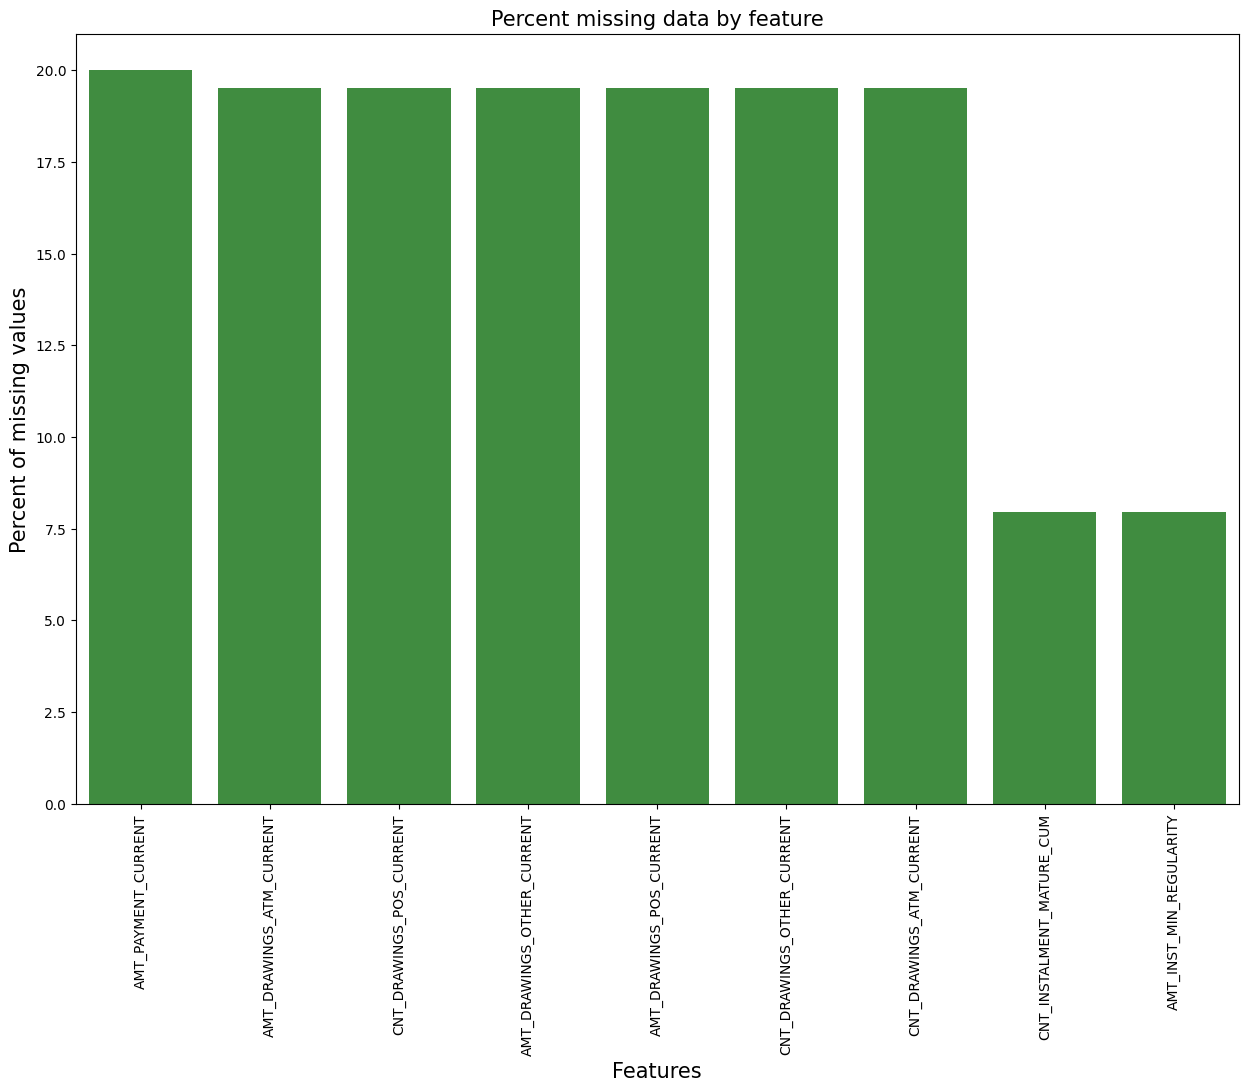

In [ ]:
missingdata(credit_card_balance)

### The Categerical and Numerical Variable

###Analyze Categorical Variables

Active           3698436
Completed         128918
Signed             11058
Demand              1365
Sent proposal        513
Refused               17
Approved               5
Name: NAME_CONTRACT_STATUS, dtype: int64


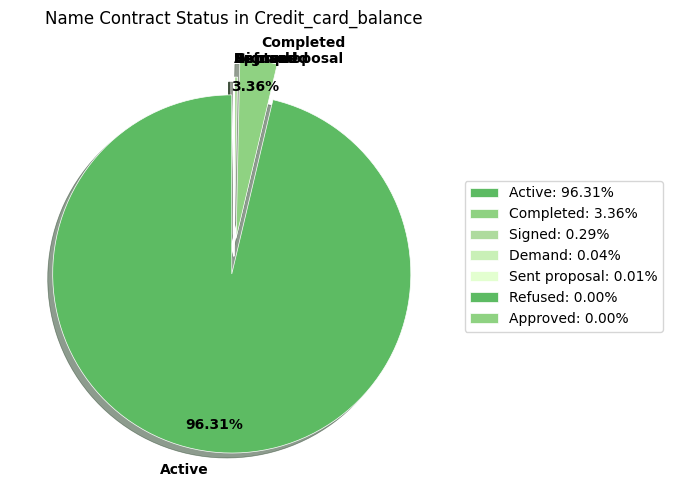

In [ ]:
import matplotlib.pyplot as plt

t = credit_card_balance['NAME_CONTRACT_STATUS'].value_counts()
total = t.sum()
percentages = (t / total) * 100
labels = percentages.index
values = percentages.values
print(t)

fig, ax = plt.subplots(figsize=(10, 5))

colors = ['#5DBB63', '#8FD282', '#AEDB9E', '#C9F0B7', '#E3FFD0']
explode = [0.1 if value >= 1 else 0 for value in values]

# Vẽ biểu đồ pie
wedges, texts, autotexts = ax.pie(
    values,
    labels=labels,
    autopct=lambda pct: f'{pct:.2f}%' if pct >= 1 else '',
    startangle=90,
    colors=colors,
    explode=explode,
    wedgeprops={'linewidth': 0.5, 'edgecolor': 'white'},
    textprops={'fontsize': 10, 'color': 'black', 'fontweight': 'bold'},
    pctdistance=0.85,
    labeldistance=1.1,
    shadow=True)

# Tạo legend
legend_labels = [f'{label}: {value:.2f}%' for label, value in zip(labels, percentages)]
ax.legend(wedges, legend_labels, loc='center left', bbox_to_anchor=(1, 0.5), fontsize=10)

ax.set_title('Name Contract Status in Credit_card_balance', fontsize=12)
plt.tight_layout()
plt.show()


In [ ]:
#identifying the categerical and numerical Variable
type_features(credit_card_balance)

categorical_features : Index(['NAME_CONTRACT_STATUS'], dtype='object')
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
numerical_features: Index(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'AMT_BALANCE',
       'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_DRAWINGS_ATM_CURRENT',
       'AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT',
       'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY',
       'AMT_PAYMENT_CURRENT', 'AMT_PAYMENT_TOTAL_CURRENT',
       'AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE', 'AMT_TOTAL_RECEIVABLE',
       'CNT_DRAWINGS_ATM_CURRENT', 'CNT_DRAWINGS_CURRENT',
       'CNT_DRAWINGS_OTHER_CURRENT', 'CNT_DRAWINGS_POS_CURRENT',
       'CNT_INSTALMENT_MATURE_CUM', 'SK_DPD', 'SK_DPD_DEF'],
      dtype='object')


NAME_CONTRACT_STATUS
                 COUNT     RATIO
Active         3698436  0.963056
Completed       128918  0.033570
Signed           11058  0.002879
Demand            1365  0.000355
Sent proposal      513  0.000134
Refused             17  0.000004
Approved             5  0.000001




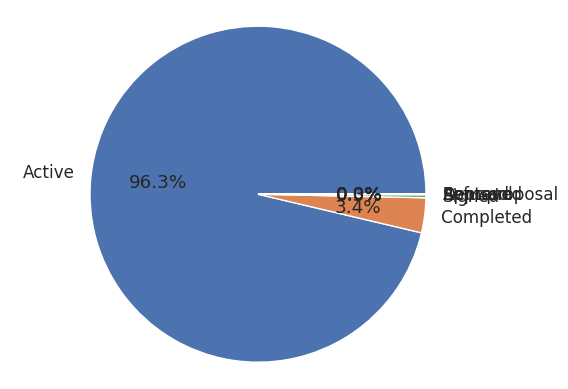

In [ ]:
# Cat Analyzer
cat_analyzer(credit_card_balance, "NAME_CONTRACT_STATUS")
categories = credit_card_balance["NAME_CONTRACT_STATUS"].value_counts()
labels = categories.index.tolist()
values = categories.values.tolist()

# Vẽ biểu đồ hình tròn
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

### unique value

In [ ]:
# Đếm số lượng giá trị duy nhất trong cột SK_ID_CURR
num_unique_SK_ID_CURR = credit_card_balance['SK_ID_CURR'].nunique()

print(f'Số lượng giá trị duy nhất trong cột SK_ID_CURR là: {num_unique_SK_ID_CURR}')

Số lượng giá trị duy nhất trong cột SK_ID_CURR là: 103558


In [ ]:
# Numeric Features
credit_card_balance.drop(["SK_ID_CURR" ,"SK_ID_PREV"], axis = 1).describe([.01, .1, .25, .5, .75, .8, .9, .95, .99])[1:]

MONTHS_BALANCE   AMT_BALANCE  AMT_CREDIT_LIMIT_ACTUAL  \
mean      -34.521921  5.830016e+04             1.538080e+05   
std        26.667751  1.063070e+05             1.651457e+05   
min       -96.000000 -4.202502e+05             0.000000e+00   
1%        -93.000000  0.000000e+00             0.000000e+00   
10%       -76.000000  0.000000e+00             0.000000e+00   
25%       -55.000000  0.000000e+00             4.500000e+04   
50%       -28.000000  0.000000e+00             1.125000e+05   
75%       -11.000000  8.904669e+04             1.800000e+05   
80%        -9.000000  1.168807e+05             2.250000e+05   
90%        -5.000000  1.800162e+05             4.275000e+05   
95%        -3.000000  2.571814e+05             4.500000e+05   
99%        -1.000000  4.662951e+05             7.650000e+05   
max        -1.000000  1.505902e+06             1.350000e+06   

      AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT  \
mean              5.961325e+03          7.433388e+03   
std               2.822569e+04          3.384608e+04   
min              -6.827310e+03         -6.211620e+03   
1%                0.000000e+00          0.000000e+00   
10%               0.000000e+00          0.000000e+00   
25%               0.000000e+00          0.000000e+00   
50%               0.000000e+00          0.000000e+00   
75%               0.000000e+00          0.000000e+00   
80%               0.000000e+00          0.000000e+00   
90%               6.750000e+03          1.125000e+04   
95%               3.375000e+04          4.500000e+04   
99%               1.350000e+05          1.575000e+05   
max               2.115000e+06          2.287098e+06   

      AMT_DRAWINGS_OTHER_CURRENT  AMT_DRAWINGS_POS_CURRENT  \
mean                2.881696e+02              2.968805e+03   
std                 8.201989e+03              2.079689e+04   
min                 0.000000e+00              0.000000e+00   
1%                  0.000000e+00              0.000000e+00   
10%                 0.000000e+00              0.000000e+00   
25%                 0.000000e+00              0.000000e+00   
50%                 0.000000e+00              0.000000e+00   
75%                 0.000000e+00              0.000000e+00   
80%                 0.000000e+00              0.000000e+00   
90%                 0.000000e+00              0.000000e+00   
95%                 0.000000e+00              1.011600e+04   
99%                 0.000000e+00              7.708061e+04   
max                 1.529847e+06              2.239274e+06   

      AMT_INST_MIN_REGULARITY  AMT_PAYMENT_CURRENT  AMT_PAYMENT_TOTAL_CURRENT  \
mean              3540.204129         1.028054e+04               7.588857e+03   
std               5600.154122         3.607808e+04               3.200599e+04   
min                  0.000000         0.000000e+00               0.000000e+00   
1%                   0.000000         0.000000e+00               0.000000e+00   
10%                  0.000000         0.000000e+00               0.000000e+00   
25%                  0.000000         1.523700e+02               0.000000e+00   
50%                  0.000000         2.702700e+03               0.000000e+00   
75%               6633.911250         9.000000e+03               6.750000e+03   
80%               7283.970000         1.080000e+04               9.000000e+03   
90%               9000.000000         1.890000e+04               1.350000e+04   
95%              13500.000000         3.150000e+04               2.340000e+04   
99%              23312.801250         1.506174e+05               1.286149e+05   
max             202882.005000         4.289207e+06               4.278316e+06   

      AMT_RECEIVABLE_PRINCIPAL  AMT_RECIVABLE  AMT_TOTAL_RECEIVABLE  \
mean              5.596588e+04   5.808881e+04          5.809829e+04   
std               1.025336e+05   1.059654e+05          1.059718e+05   
min              -4.233058e+05  -4.202502e+05         -4.202502e+05   
1%                0.000000e+00  -4.872600e+02     

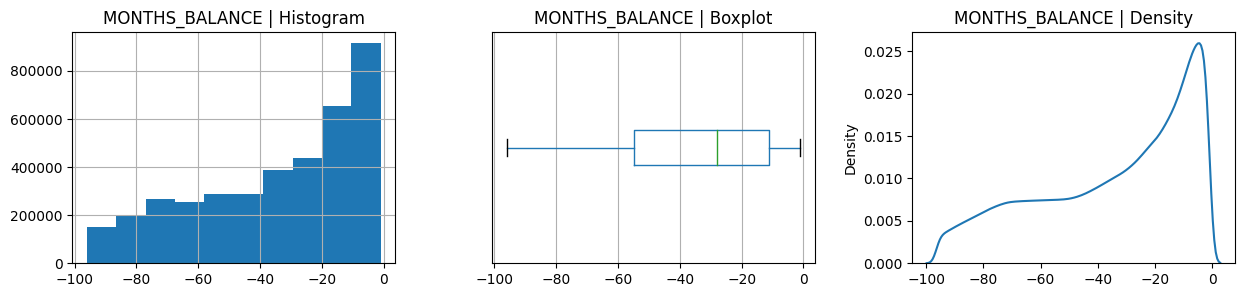

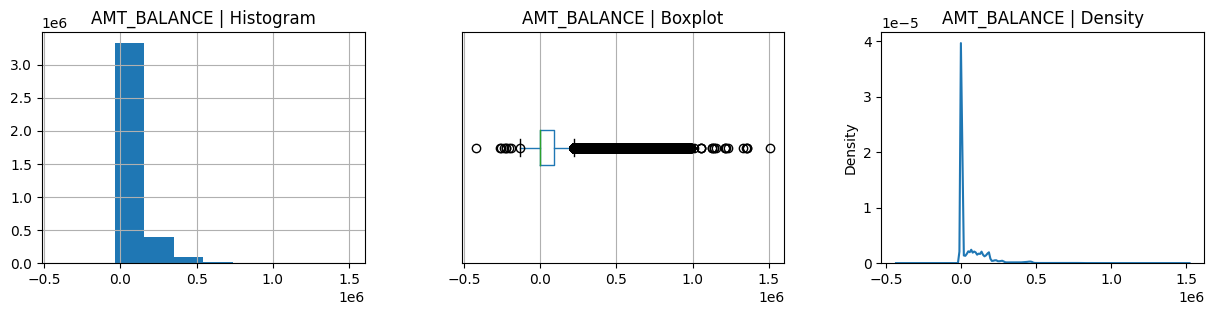

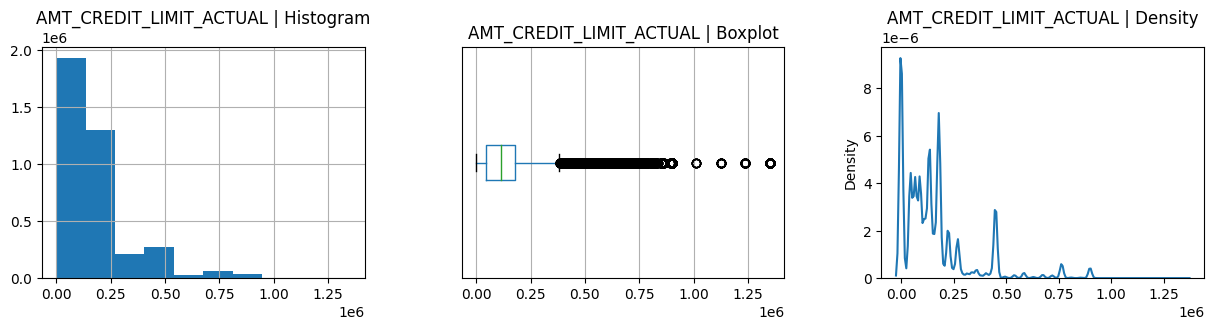

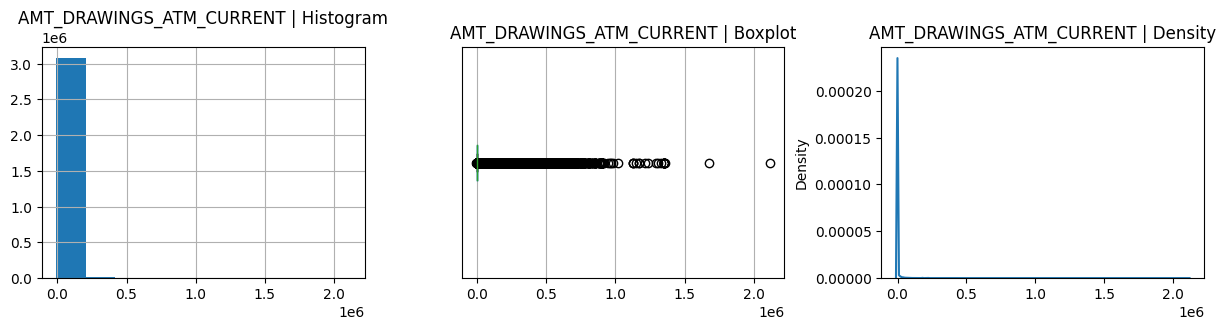

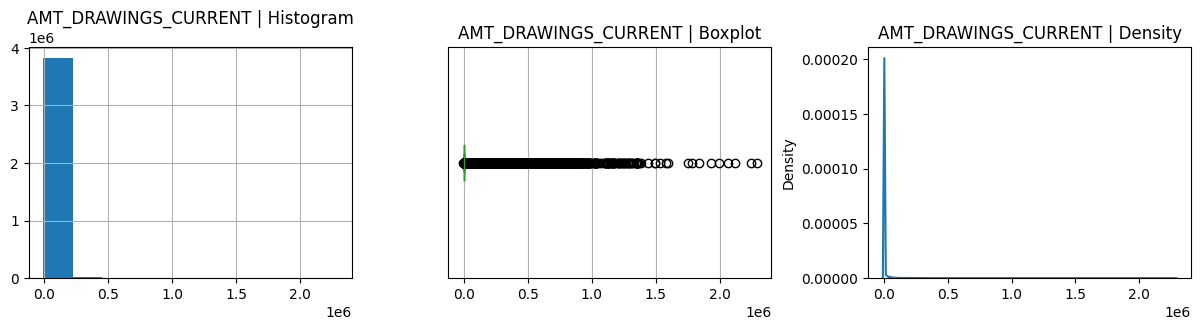

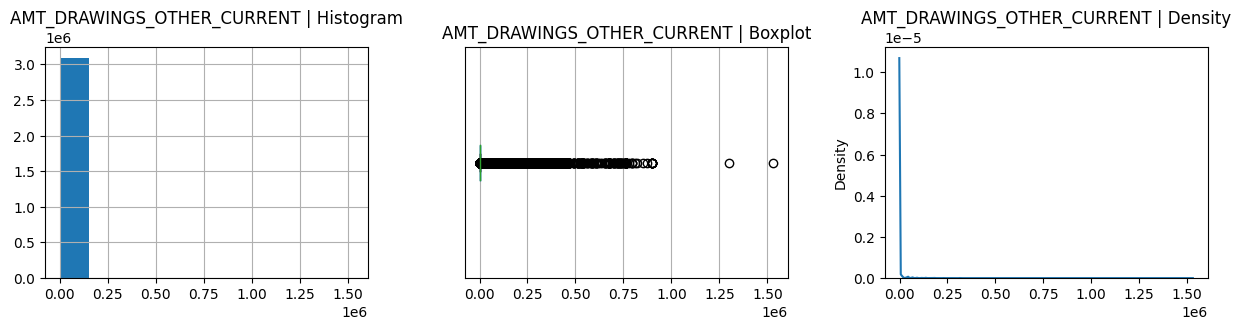

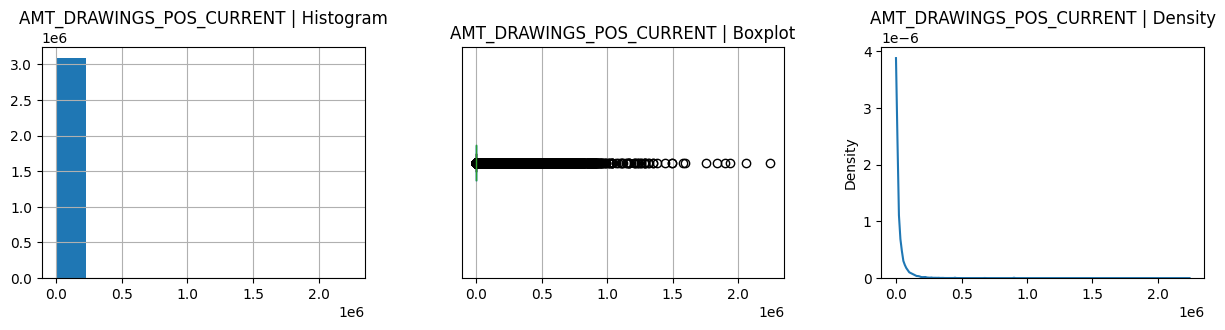

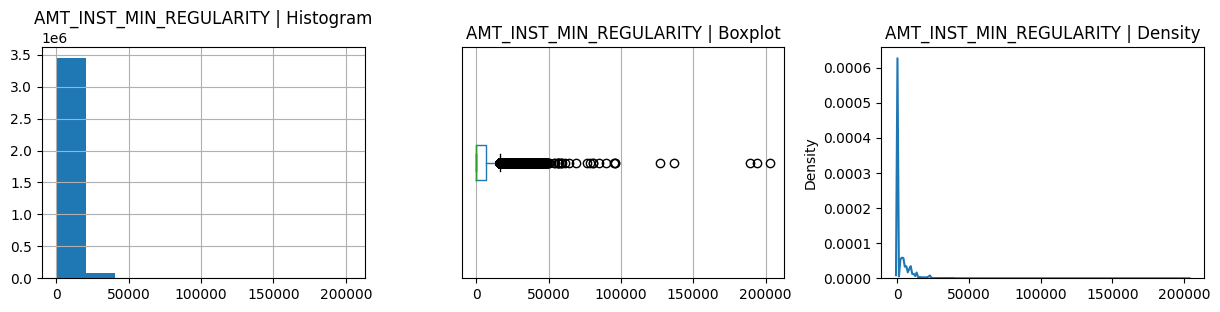

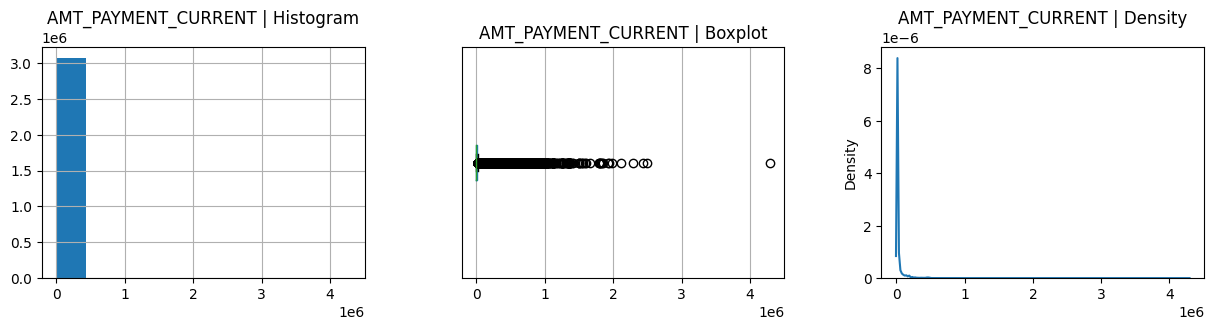

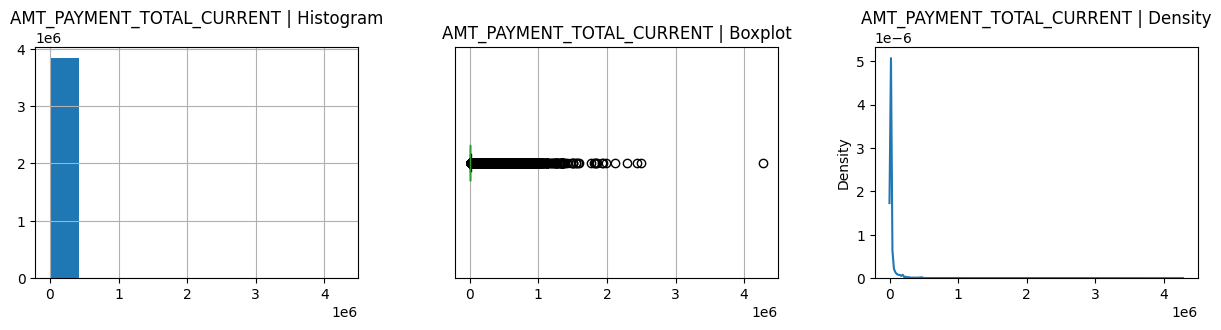

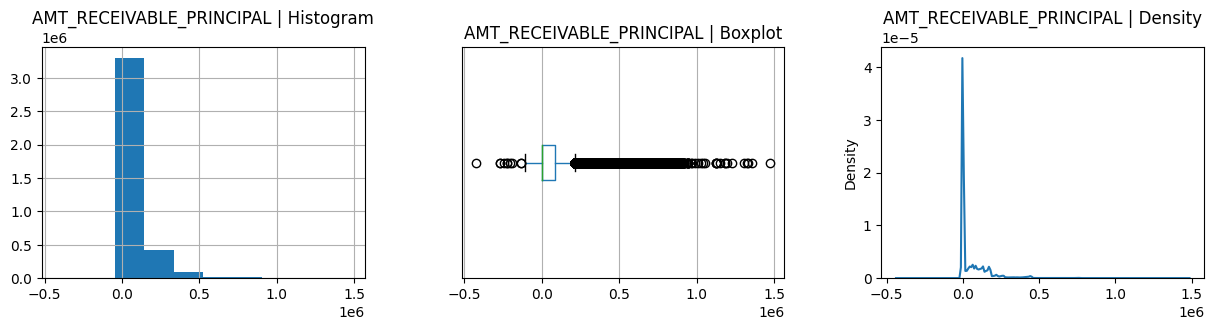

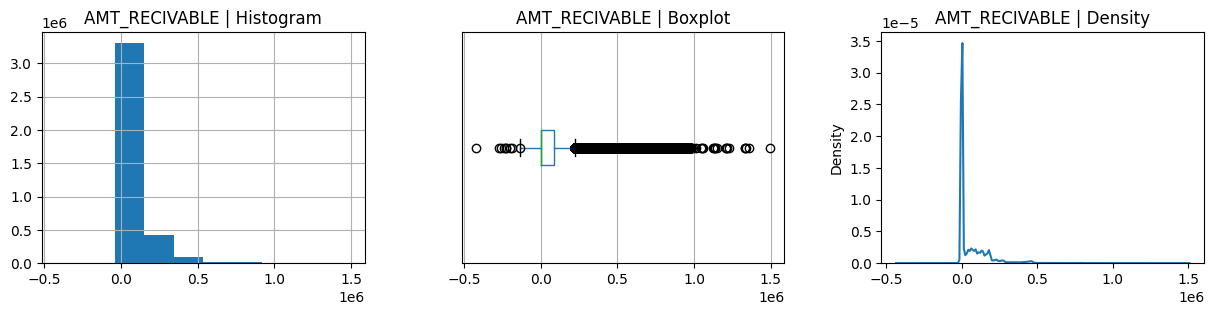

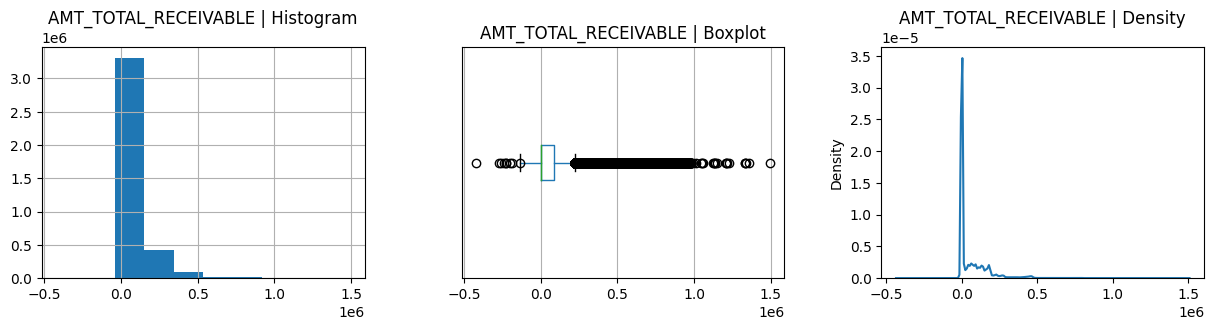

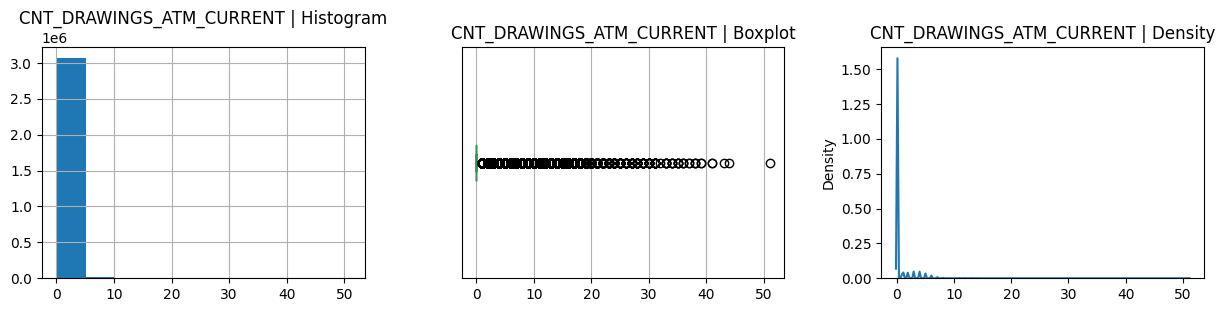

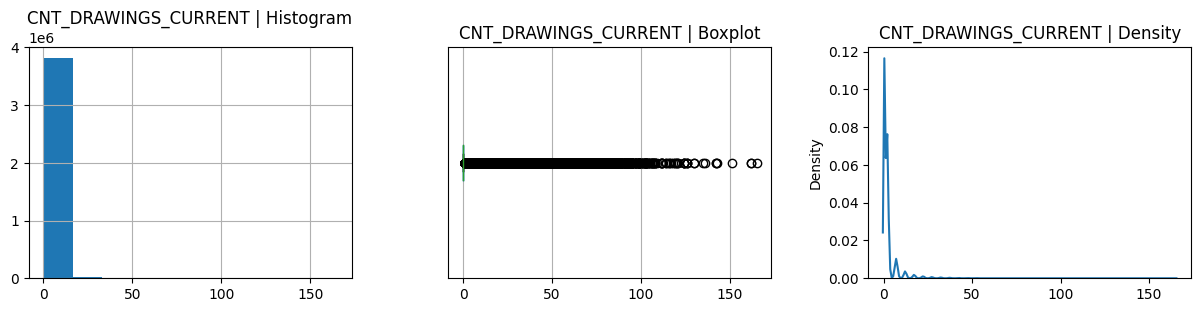

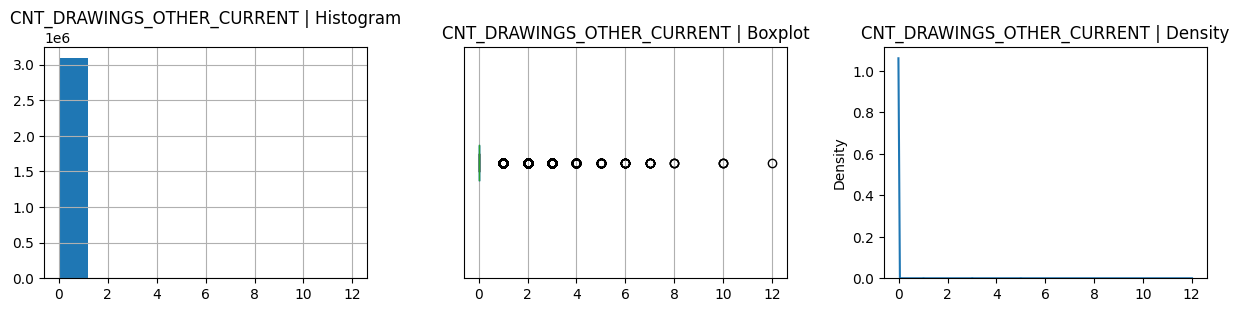

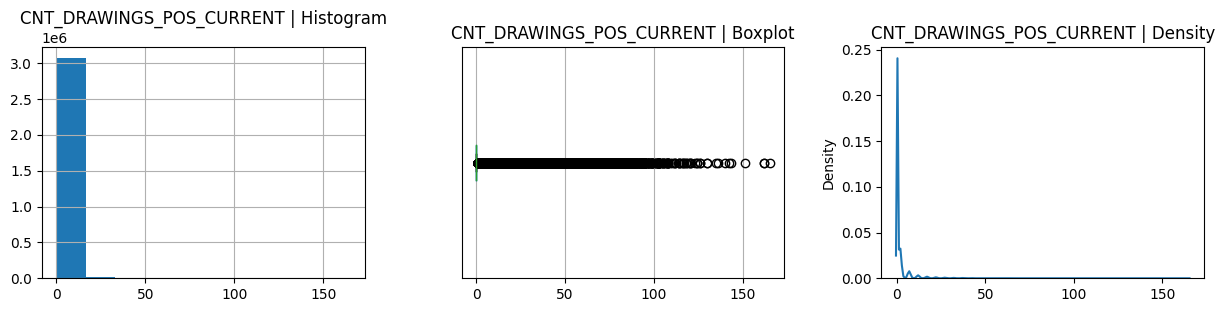

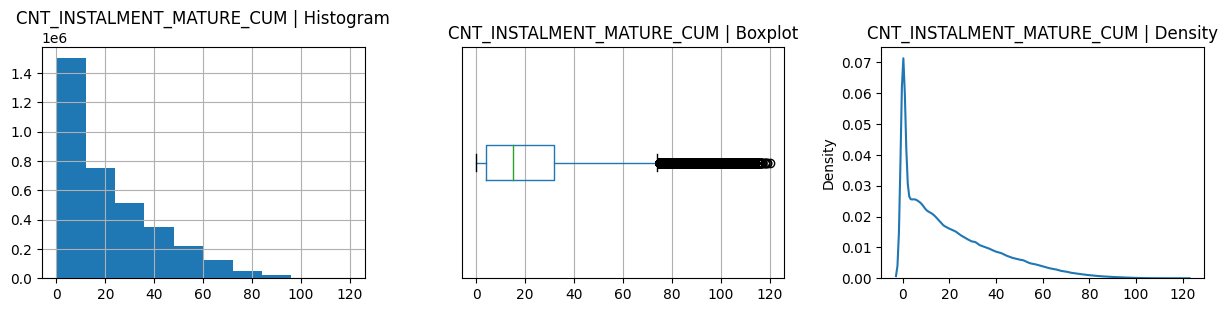

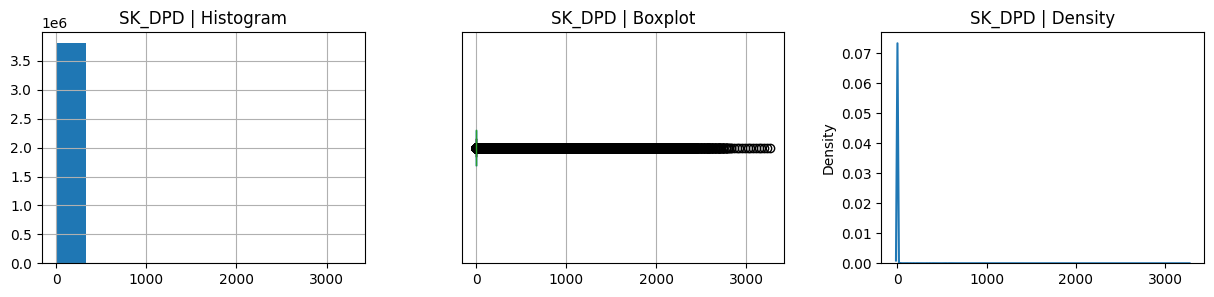

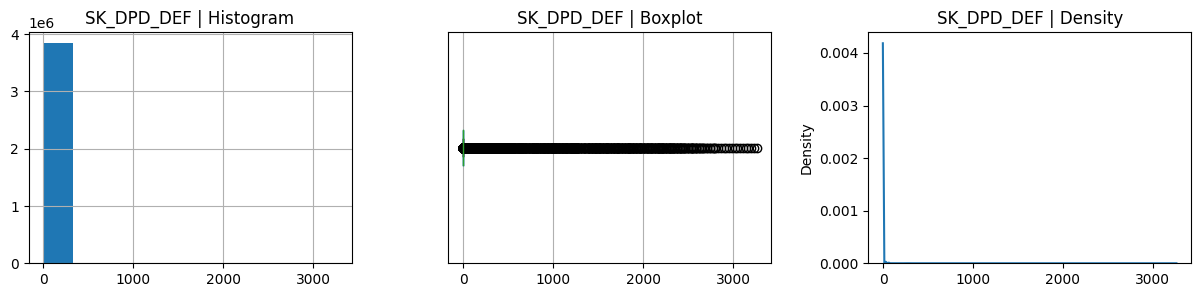

In [ ]:
# Quick Visualization for numerical variables
num_plot(credit_card_balance, num_cols=num_cols, remove=['SK_ID_CURR','SK_ID_PREV'], figsize = (15,3))

###Correlation

<ipython-input-11-5c37195b9abc>:7: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



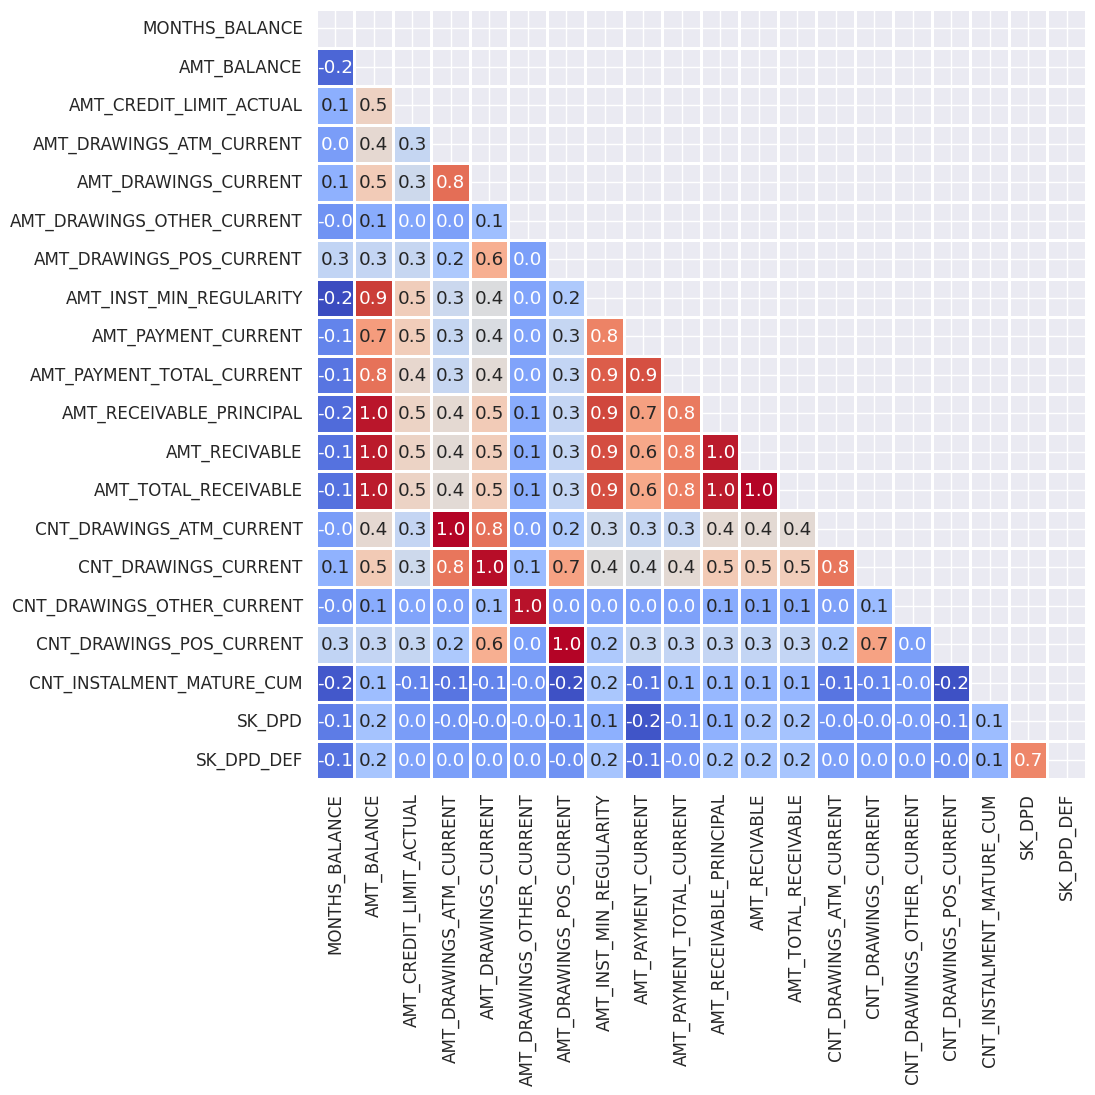

In [ ]:
# Correlation
corr_plot(credit_card_balance, remove=['SK_ID_CURR','SK_ID_PREV'], corr_coef = "spearman", figsize = (10,10))

##Merged_credit


###Get data overview

In [ ]:
get_data_overview(merged_credit)

------------------------------------------------------------------------------------------------------------------------
                                            Numeric Columns (127 attributes)                                            
------------------------------------------------------------------------------------------------------------------------
Column Name          Data Type  No of Unique Values  No of Missing Values % of Missing Values  No of Duplicates    
------------------------------------------------------------------------------------------------------------------------
SK_ID_CURR                int64                83142                    0                  0.0                    0
TARGET                    int64                    2                    0                  0.0                    0
CNT_CHILDREN              int64                   10                    0                  0.0                    0
AMT_INCOME_TOTAL        float64                  852

In [ ]:
# Correlation
corr_plot(merged_credit, remove=['SK_ID_CURR','SK_ID_PREV'], corr_coef = "spearman", figsize = (100,100))

<ipython-input-17-5c37195b9abc>:7: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



KeyboardInterrupt: ignored

In [ ]:
def plot_pie_chart(data):
    counts = data['SK_ID_CURR'].groupby(data['NAME_FAMILY_STATUS']).count()
    labels = counts.index
    sizes = counts.values
    total = sum(sizes)
    percentages = [(size/total)*100 for size in sizes]

    fig, ax = plt.subplots()
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    ax.axis('equal')
    ax.set_title('Count of SK_ID_CURR by NAME_FAMILY_STATUS')

    plt.show()

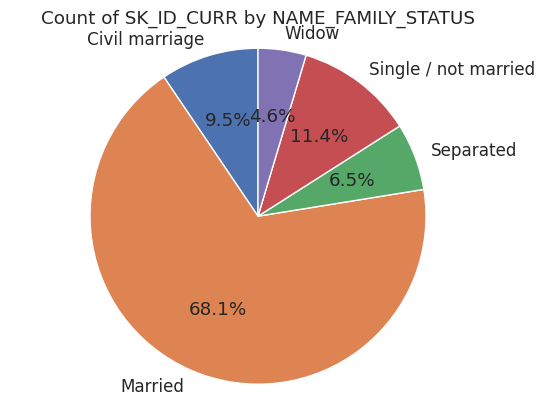

In [ ]:
plot_pie_chart(merged_credit)

In [ ]:
def plot_column_chart(data):
    plt.figure(figsize=(12, 6))
    counts = data.groupby('NAME_INCOME_TYPE')['NAME_CONTRACT_STATUS'].count()
    counts.plot(kind='bar')
    plt.xlabel('NAME_INCOME_TYPE')
    plt.ylabel('Count')
    plt.title('Count of NAME_CONTRACT_STATUS by NAME_INCOME_TYPE')
    plt.show()

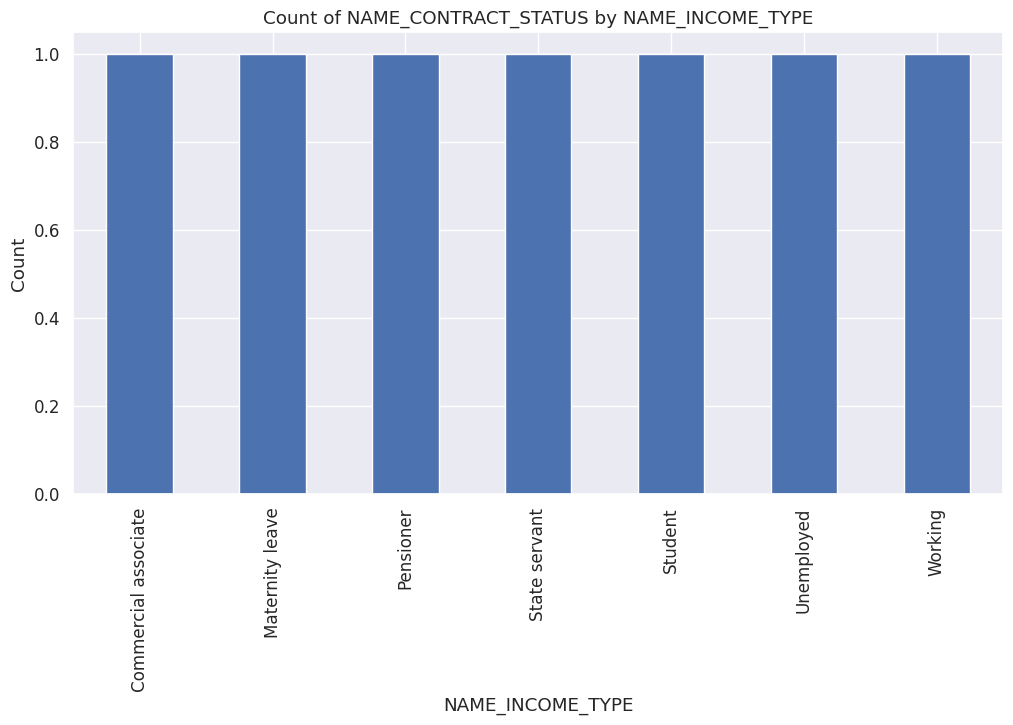

In [ ]:
data = pd.DataFrame({
    'NAME_INCOME_TYPE': ['Commercial associate', 'Maternity leave', 'Pensioner', 'State servant', 'Student','Unemployed','Working'],
    'NAME_CONTRACT_STATUS': ['Active', 'Approved', 'Completed', 'Demand', 'Refused','Sent proposal','Signed']
})

# Gọi hàm để hiển thị biểu đồ cột
plot_column_chart(data)

In [ ]:
def plot_pie_chart(data):
    approved_data = data[data['NAME_CONTRACT_STATUS'] == 'Approved']
    counts = approved_data['SK_ID_CURR'].groupby(approved_data['NAME_EDUCATION_TYPE']).count()
    labels = counts.index
    sizes = counts.values
    total = sum(sizes)
    percentages = [(size/total)*100 for size in sizes]

    fig, ax = plt.subplots()
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    ax.axis('equal')
    ax.set_title('Education Level of Approved Loan Applicants')

    plt.show()

In [ ]:
data = pd.DataFrame({
    'SK_ID_CURR',
    'NAME_CONTRACT_STATUS',
    'NAME_EDUCATION_TYPE'
})

# Gọi hàm để hiển thị biểu đồ tròn
plot_pie_chart(data)

KeyError: ignored

##POS CASH Balance Data

###Snapshot


In [ ]:
cat_cols, cat_but_car, num_cols, num_but_cat = grab_col_names(POS_CASH_balance, car_th=10)

Observations: 10001358
Variables: 8
date_cols: 0
cat_cols: 1
num_cols: 7
cat_but_car: 0
num_but_cat: 0


In [ ]:
POS_CASH_balance.head()

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
0     1803195      182943             -31            48.0   
1     1715348      367990             -33            36.0   
2     1784872      397406             -32            12.0   
3     1903291      269225             -35            48.0   
4     2341044      334279             -35            36.0   

   CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
0                   45.0               Active       0           0  
1                   35.0               Active       0           0  
2                    9.0               Active       0           0  
3                   42.0               Active       0           0  
4                   35.0               Active       0           0

###Get data overview

In [ ]:
get_data_overview(POS_CASH_balance)

------------------------------------------------------------------------------------------------------------------------
                                             Numeric Columns (7 attributes)                                             
------------------------------------------------------------------------------------------------------------------------
Column Name          Data Type  No of Unique Values  No of Missing Values % of Missing Values  No of Duplicates    
------------------------------------------------------------------------------------------------------------------------
SK_ID_PREV                int64               936325                    0                  0.0                    0
SK_ID_CURR                int64               337252                    0                  0.0                    0
MONTHS_BALANCE            int64                   96                    0                  0.0                    0
CNT_INSTALMENT          float64                   73

In [ ]:
print("POS_CASH_balance -  rows:",POS_CASH_balance.shape[0]," columns:", POS_CASH_balance.shape[1])

POS_CASH_balance -  rows: 10001358  columns: 8


In [ ]:
POS_CASH_balance.columns.values

array(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'CNT_INSTALMENT',
       'CNT_INSTALMENT_FUTURE', 'NAME_CONTRACT_STATUS', 'SK_DPD',
       'SK_DPD_DEF'], dtype=object)

In [ ]:
type_features(POS_CASH_balance)

categorical_features : Index(['NAME_CONTRACT_STATUS'], dtype='object')
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
numerical_features: Index(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'CNT_INSTALMENT',
       'CNT_INSTALMENT_FUTURE', 'SK_DPD', 'SK_DPD_DEF'],
      dtype='object')


### Missing data

Total   Percent
CNT_INSTALMENT_FUTURE  26087  0.260835
CNT_INSTALMENT         26071  0.260675

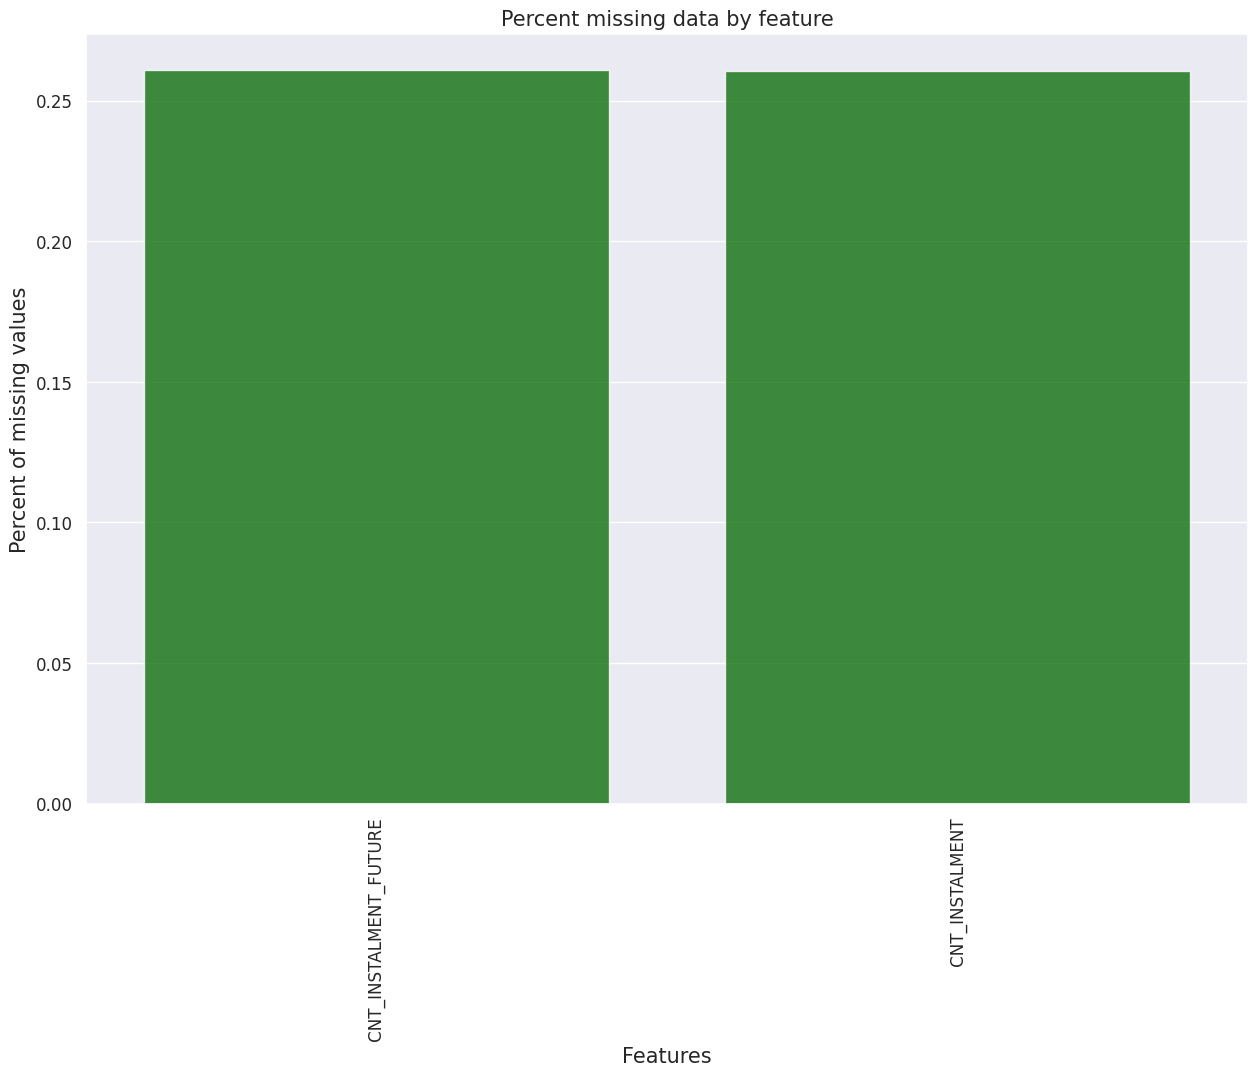

In [ ]:
missingdata(POS_CASH_balance)

### The Categerical and Numerical Variable

Active                   9151119
Completed                 744883
Signed                     87260
Demand                      7065
Returned to the store       5461
Approved                    4917
Amortized debt               636
Canceled                      15
XNA                            2
Name: NAME_CONTRACT_STATUS, dtype: int64


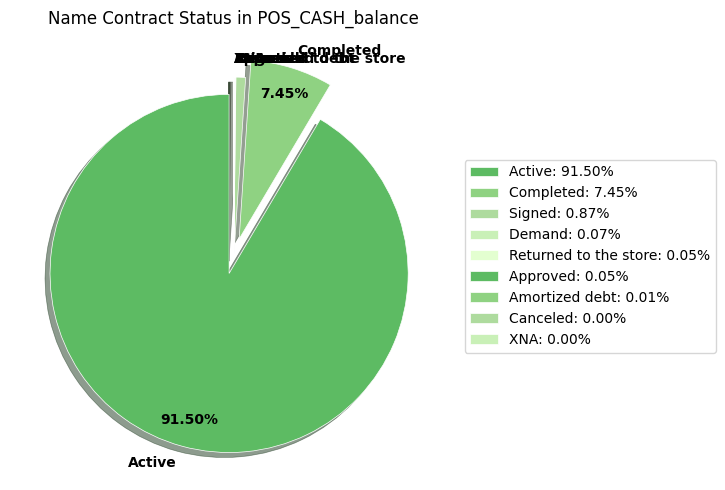

In [ ]:
import matplotlib.pyplot as plt

t = POS_CASH_balance['NAME_CONTRACT_STATUS'].value_counts()
total = t.sum()
percentages = (t / total) * 100
labels = percentages.index
values = percentages.values
print(t)

fig, ax = plt.subplots(figsize=(10, 5))

colors = ['#5DBB63', '#8FD282', '#AEDB9E', '#C9F0B7', '#E3FFD0']
explode = [0.1 if value >= 1 else 0 for value in values]

# Vẽ biểu đồ pie
wedges, texts, autotexts = ax.pie(
    values,
    labels=labels,
    autopct=lambda pct: f'{pct:.2f}%' if pct >= 1 else '',
    startangle=90,
    colors=colors,
    explode=explode,
    wedgeprops={'linewidth': 0.5, 'edgecolor': 'white'},
    textprops={'fontsize': 10, 'color': 'black', 'fontweight': 'bold'},
    pctdistance=0.85,
    labeldistance=1.1,
    shadow=True)

# Tạo legend
legend_labels = [f'{label}: {value:.2f}%' for label, value in zip(labels, percentages)]
ax.legend(wedges, legend_labels, loc='center left', bbox_to_anchor=(1, 0.5), fontsize=10)

ax.set_title('Name Contract Status in POS_CASH_balance', fontsize=12)
plt.tight_layout()
plt.show()


In [ ]:
#identifying the categerical and numerical Variable
type_features(POS_CASH_balance)

categorical_features : Index(['NAME_CONTRACT_STATUS'], dtype='object')
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
numerical_features: Index(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'CNT_INSTALMENT',
       'CNT_INSTALMENT_FUTURE', 'SK_DPD', 'SK_DPD_DEF'],
      dtype='object')


In [ ]:
# Cat Analyzer
cat_analyzer(POS_CASH_balance, "NAME_CONTRACT_STATUS")

NAME_CONTRACT_STATUS
                         COUNT         RATIO
Active                 9151119  9.149876e-01
Completed               744883  7.447819e-02
Signed                   87260  8.724815e-03
Demand                    7065  7.064041e-04
Returned to the store     5461  5.460258e-04
Approved                  4917  4.916332e-04
Amortized debt             636  6.359136e-05
Canceled                    15  1.499796e-06
XNA                          2  1.999728e-07




In [ ]:
# Numeric Features
POS_CASH_balance.drop(["SK_ID_CURR" ,"SK_ID_PREV"], axis = 1).describe([.01, .1, .25, .5, .75, .8, .9, .95, .99])[1:]

MONTHS_BALANCE  CNT_INSTALMENT  CNT_INSTALMENT_FUTURE       SK_DPD  \
mean      -35.012588       17.089650              10.483840    11.606928   
std        26.066570       11.995056              11.109058   132.714043   
min       -96.000000        1.000000               0.000000     0.000000   
1%        -94.000000        4.000000               0.000000     0.000000   
10%       -77.000000        6.000000               0.000000     0.000000   
25%       -54.000000       10.000000               3.000000     0.000000   
50%       -28.000000       12.000000               7.000000     0.000000   
75%       -13.000000       24.000000              14.000000     0.000000   
80%       -11.000000       24.000000              17.000000     0.000000   
90%        -6.000000       36.000000              24.000000     0.000000   
95%        -4.000000       45.000000              35.000000     0.000000   
99%        -2.000000       60.000000              53.000000   235.000000   
max        -1.000000       92.000000              85.000000  4231.000000   

       SK_DPD_DEF  
mean     0.654468  
std     32.762491  
min      0.000000  
1%       0.000000  
10%      0.000000  
25%      0.000000  
50%      0.000000  
75%      0.000000  
80%      0.000000  
90%      0.000000  
95%      0.000000  
99%      1.000000  
max   3595.000000

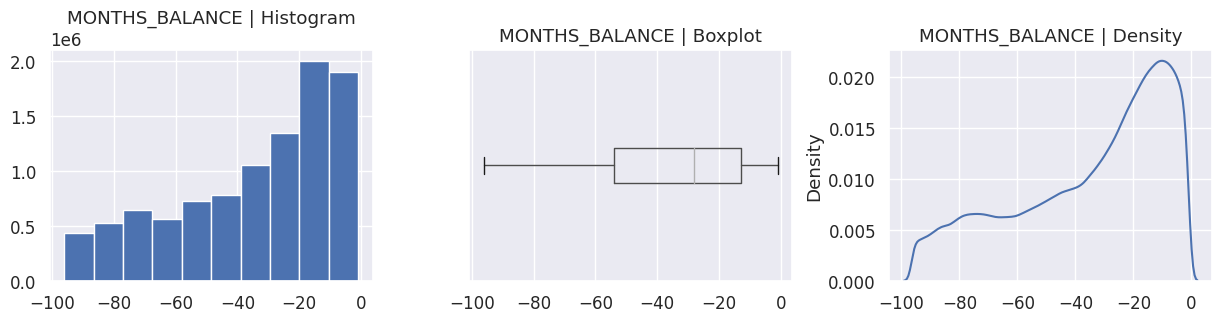

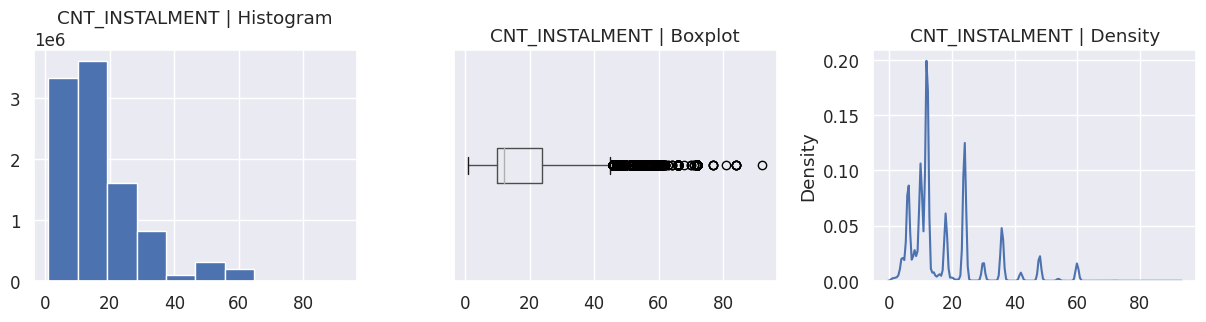

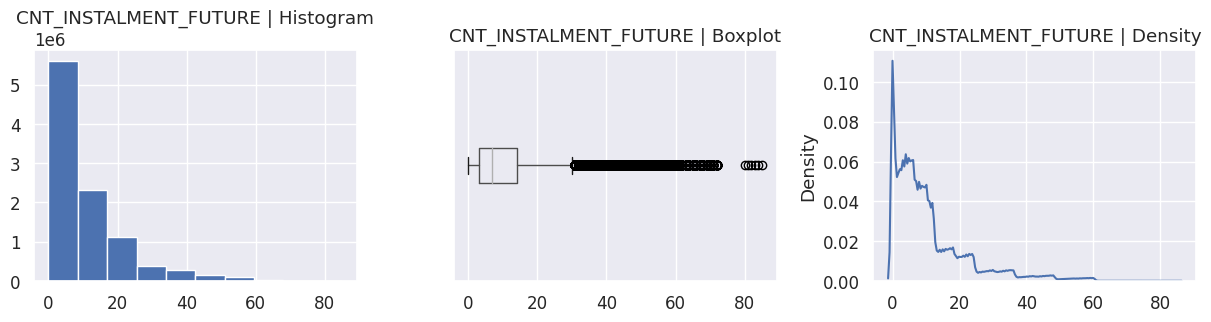

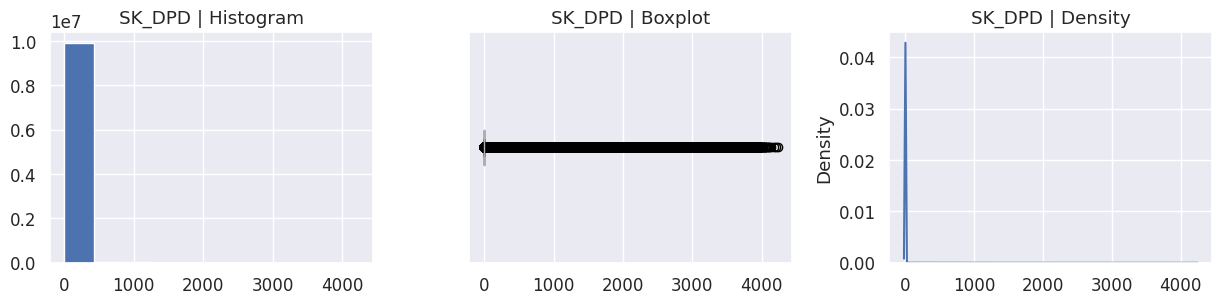

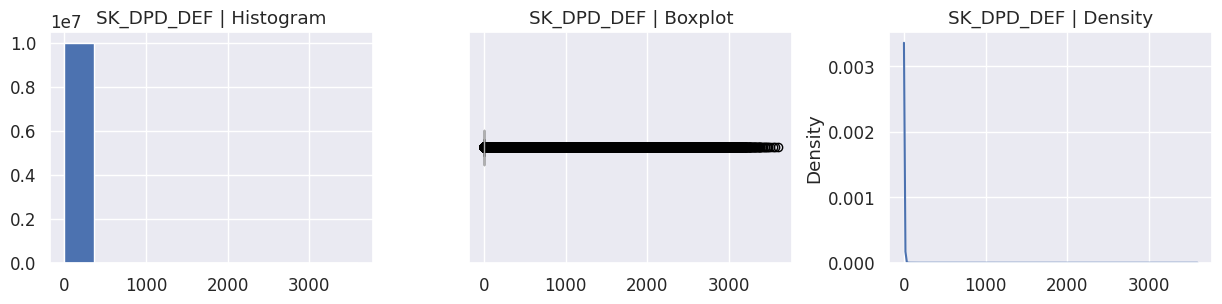

In [ ]:
# Quick Visualization for numerical variables
num_plot(POS_CASH_balance, num_cols=num_cols, remove=['SK_ID_CURR','SK_ID_PREV'], figsize = (15,3))

###Correlation

<ipython-input-9-5c37195b9abc>:7: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



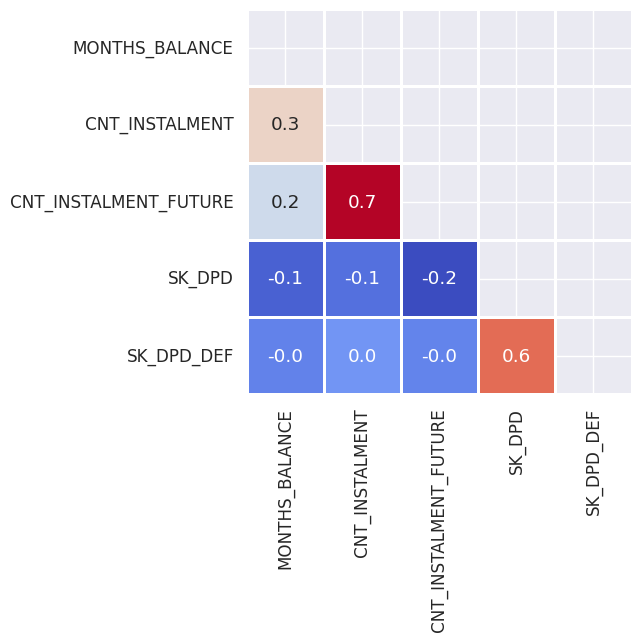

In [ ]:
# Correlation
corr_plot(POS_CASH_balance, remove=['SK_ID_CURR','SK_ID_PREV'], corr_coef = "spearman", figsize = (5,5))

## Application Train

In [ ]:
def bar_hor(df, col, title, color, w=None, h=None, lm=0, limit=100, rev=False, xlb=False):
    cnt_srs = df[col].value_counts()
    yy = cnt_srs.head(limit).index[::-1]
    xx = cnt_srs.head(limit).values[::-1]
    if rev:
        yy = cnt_srs.tail(limit).index[::-1]
        xx = cnt_srs.tail(limit).values[::-1]
    if xlb:
        fig, ax = plt.subplots(figsize=(w/100, h/100)) if w and h else plt.subplots()
        ax.barh(xlb, xx, color=color)
    else:
        fig, ax = plt.subplots(figsize=(w/100, h/100)) if w and h else plt.subplots()
        ax.barh(yy, xx, color=color)

    ax.set_title(title, fontsize=14, fontweight='bold', y=1.05)
    ax.set_xlabel("Count", labelpad=20, weight='bold', size=12)
    ax.set_ylabel("Target", labelpad=20, weight='bold', size=12)
    ax.invert_yaxis()
    ax.grid(axis='x', linestyle='--', linewidth=0.5)

    for i in range(len(xx)):
        ax.text(xx[i]+lm, i, str(xx[i]), fontsize=9, fontweight='bold')

    plt.tight_layout()
    plt.show()

    return yy, xx



def gp(col, title):
    df1 = application_train[application_train["TARGET"] == 1]
    df0 = application_train[application_train["TARGET"] == 0]
    a1 = df1[col].value_counts()
    b1 = df0[col].value_counts()

    total = dict(application_train[col].value_counts())
    x0 = a1.index
    x1 = b1.index

    y0 = [float(x)*100 / total[x0[i]] for i,x in enumerate(a1.values)]
    y1 = [float(x)*100 / total[x1[i]] for i,x in enumerate(b1.values)]

    fig, ax = plt.subplots(figsize=(9, 3.5))
    ax.bar(x0, y0, color="#96D38C", label='Target : 1')
    ax.bar(x1, y1, color="#FEBFB3", label='Target : 0')

    ax.set_title(title, fontsize=14, fontweight='bold', y=1.05)
    ax.set_xlabel(col, labelpad=20, weight='bold', size=12)
    ax.set_ylabel("Proportion", labelpad=20, weight='bold', size=12)
    ax.legend(loc='upper right')
    ax.grid(axis='x', linestyle='--', linewidth=0.5)

    plt.tight_layout()
    plt.show()


In [ ]:
def bar_hor_noagg(x, y, title, color, w=None, h=None, lm=0, limit=100, rt=False):
    fig, ax = plt.subplots(figsize=(w/100, h/100))
    ax.barh(y, x, color=color)

    ax.set_title(title, fontsize=14, fontweight='bold', y=1.05)
    ax.set_xlabel("Count", labelpad=20, weight='bold', size=12)
    ax.set_ylabel("Target", labelpad=20, weight='bold', size=12)
    ax.invert_yaxis()
    ax.grid(axis='x', linestyle='--', linewidth=0.5)

    for i in range(len(x)):
        ax.text(x[i]+lm, i, str(x[i]), fontsize=9, fontweight='bold')

    plt.tight_layout()

    if rt:
        return ax
    else:
        plt.show()

In [ ]:
def bar_ver_noagg(x, y, title, color, w=None, h=None, lm=0, rt=False):
    fig, ax = plt.subplots(figsize=(w/100, h/100))
    ax.bar(x, y, color=color)

    ax.set_title(title, fontsize=14, fontweight='bold', y=1.05)
    ax.set_xlabel("Count", labelpad=20, weight='bold', size=12)
    ax.set_ylabel("Target", labelpad=20, weight='bold', size=12)
    ax.grid(axis='y', linestyle='--', linewidth=0.5)

    for i in range(len(x)):
        ax.text(i, y[i]+lm, str(y[i]), fontsize=9, fontweight='bold')

    plt.tight_layout()

    if rt:
        return ax
    else:
        plt.show()

###Snapshot

In [ ]:
application_train.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

###Distribution of Target Variable ¶

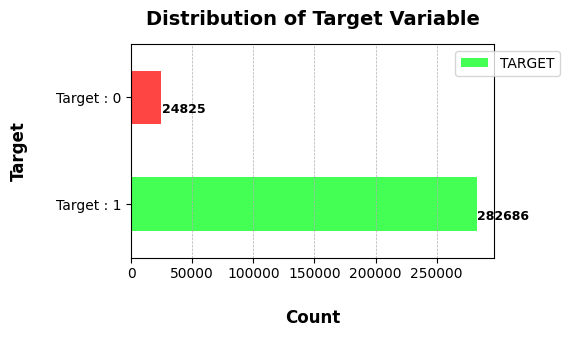

In [ ]:

def bar_hor(data, target_col, title, colors, h, w, lm, xlb):
    plt.figure(figsize=(w/100, h/100), dpi=100)
    ax = plt.subplot(111)
    data[target_col].value_counts().plot.barh(ax=ax, color=colors)
    ax.set_title(title, fontsize=14, fontweight='bold', y=1.05)
    ax.set_xlabel("Count", labelpad=20, weight='bold', size=12)
    ax.set_ylabel("Target", labelpad=20, weight='bold', size=12)
    ax.set_yticklabels(xlb, rotation=0, fontsize=10)
    ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
    ax.grid(axis='x', linestyle='--', linewidth=0.5)

    for i in ax.patches:
        ax.text(i.get_width()+lm, i.get_y()+0.1, str(i.get_width()), fontsize=9, fontweight='bold')

    plt.tight_layout()
    plt.show()

# Sử dụng hàm để vẽ biểu đồ
bar_hor(application_train, "TARGET", "Distribution of Target Variable", ["#44ff54", '#ff4444'], 350, 600, 200, ['Target : 1','Target : 0'])


###Family Status of Applicants

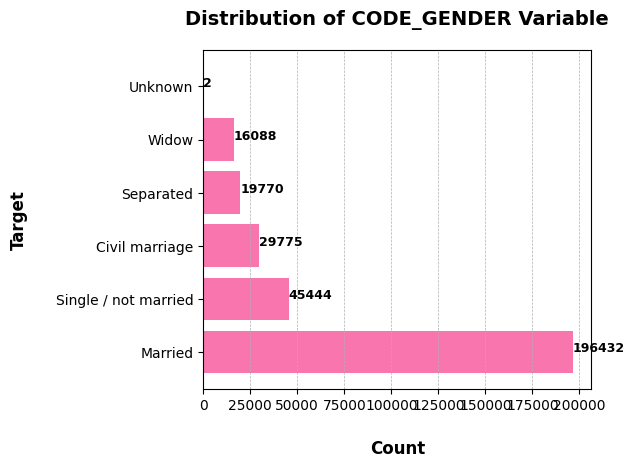

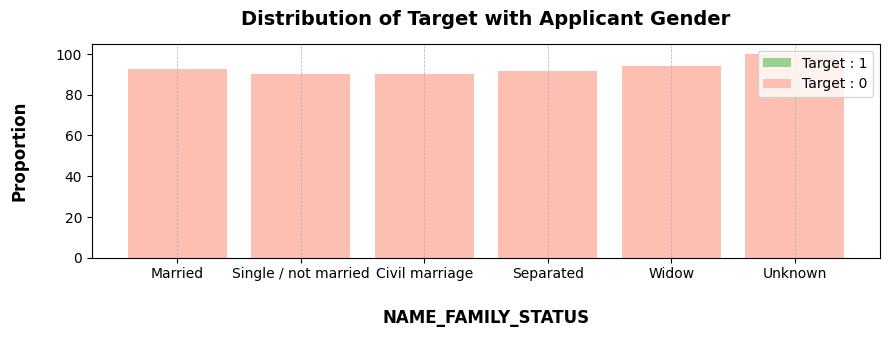

AttributeError: ignored

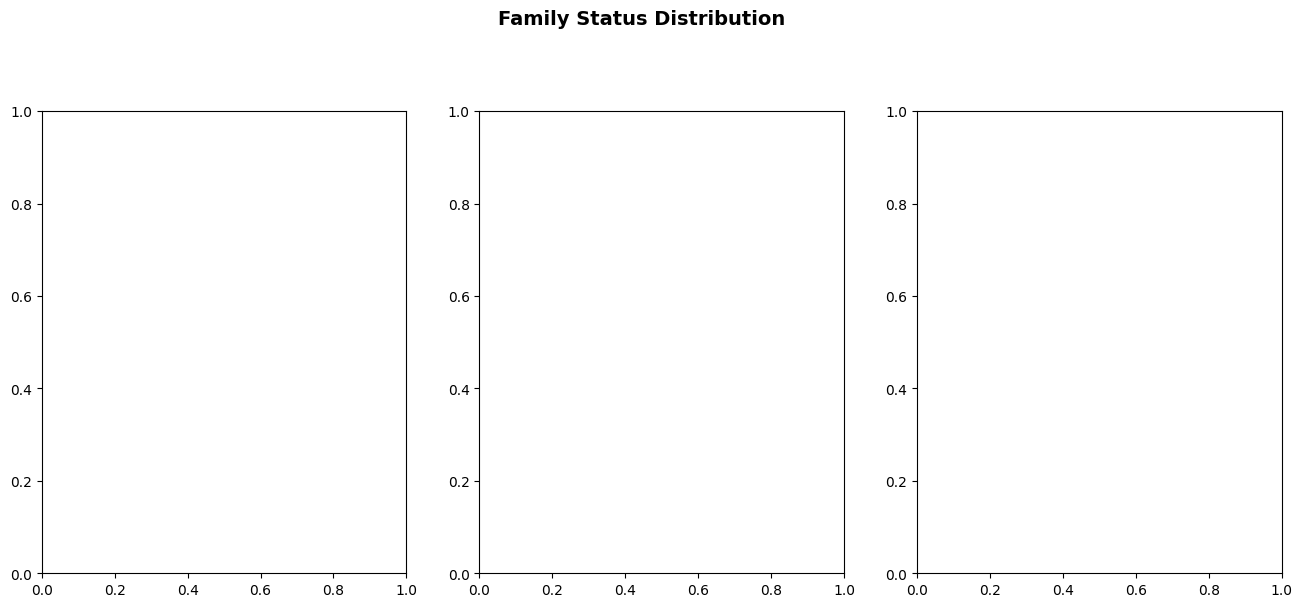

In [ ]:
tr0 = bar_hor(application_train, "NAME_FAMILY_STATUS", "Distribution of CODE_GENDER Variable", "#f975ae", w=700, lm=100)
tr1 = gp('NAME_FAMILY_STATUS', 'Distribution of Target with Applicant Gender')

fig, axes = plt.subplots(1, 3, figsize=(16, 6))
fig.suptitle("Family Status Distribution", fontsize=14, fontweight='bold', y=1.05)

axes[0].remove()
axes[0] = plt.subplot(1, 3, 1)
axes[1] = plt.subplot(1, 3, 2)
axes[2] = plt.subplot(1, 3, 3)
axes[0].barh(tr0.get_y(), tr0.get_width(), color=tr0.get_facecolor())
axes[0].set_title(tr0.get_title())
axes[0].set_xlabel(tr0.get_xlabel())
axes[0].set_ylabel(tr0.get_ylabel())
axes[0].invert_yaxis()
axes[0].grid(axis='x', linestyle='--', linewidth=0.5)

axes[1].bar(tr1.get_x(), tr1.get_height(), color=tr1.get_facecolor())
axes[1].set_title(tr1.get_title())
axes[1].set_xlabel(tr1.get_xlabel())
axes[1].set_ylabel(tr1.get_ylabel())
axes[1].legend(loc='upper right')
axes[1].grid(axis='x', linestyle='--', linewidth=0.5)

axes[2].bar(tr2.get_x(), tr2.get_height(), color=tr2.get_facecolor())
axes[2].set_title(tr2.get_title())
axes[2].set_xlabel(tr2.get_xlabel())
axes[2].set_ylabel(tr2.get_ylabel())
axes[2].legend(loc='upper right')
axes[2].grid(axis='x', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()


-----------------

In [ ]:
application_train.columns.values

array(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3',

###Mising data

In [ ]:
missingdata((application_train)['SK_ID_CURR',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'DAYS_BIRTH',
 'OCCUPATION_TYPE',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'WALLSMATERIAL_MODE',
 'HOUSETYPE_MODE',
 'CNT_FAM_MEMBERS', 'TARGET'])

NameError: ignored

###The Numerical Variable

In [ ]:
# Numeric Features
application_train.drop(["SK_ID_CURR" ], axis = 1).describe([.01, .1, .25, .5, .75, .8, .9, .95, .99])[1:]

TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT    AMT_ANNUITY  \
mean  0.080729      0.417052      1.687979e+05  5.990260e+05   27108.573909   
std   0.272419      0.722121      2.371231e+05  4.024908e+05   14493.737315   
min   0.000000      0.000000      2.565000e+04  4.500000e+04    1615.500000   
1%    0.000000      0.000000      4.500000e+04  7.641000e+04    6182.910000   
10%   0.000000      0.000000      8.100000e+04  1.800000e+05   11074.500000   
25%   0.000000      0.000000      1.125000e+05  2.700000e+05   16524.000000   
50%   0.000000      0.000000      1.471500e+05  5.135310e+05   24903.000000   
75%   0.000000      1.000000      2.025000e+05  8.086500e+05   34596.000000   
80%   0.000000      1.000000      2.250000e+05  9.000000e+05   37516.500000   
90%   0.000000      2.000000      2.700000e+05  1.133748e+06   45954.000000   
95%   1.000000      2.000000      3.375000e+05  1.350000e+06   53325.000000   
99%   1.000000      3.000000      4.725000e+05  1.854000e+06   70006.500000   
max   1.000000     19.000000      1.170000e+08  4.050000e+06  258025.500000   

      AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE    DAYS_BIRTH  \
mean     5.383962e+05                    0.020868 -16036.995067   
std      3.694465e+05                    0.013831   4363.988632   
min      4.050000e+04                    0.000290 -25229.000000   
1%       6.750000e+04                    0.002134 -24419.000000   
10%      1.800000e+05                    0.006629 -22181.000000   
25%      2.385000e+05                    0.010006 -19682.000000   
50%      4.500000e+05                    0.018850 -15750.000000   
75%      6.795000e+05                    0.028663 -12413.000000   
80%      8.145000e+05                    0.030755 -11694.000000   
90%      1.093500e+06                    0.035792 -10284.000000   
95%      1.305000e+06                    0.046220  -9407.000000   
99%      1.800000e+06                    0.072508  -8263.000000   
max      4.050000e+06                    0.072508  -7489.000000   

      DAYS_EMPLOYED  DAYS_REGISTRATION  ...  FLAG_DOCUMENT_18  \
mean   63815.045904       -4986.120328  ...          0.008130   
std   141275.766519        3522.886321  ...          0.089798   
min   -17912.000000      -24672.000000  ...          0.000000   
1%    -10894.900000      -13879.000000  ...          0.000000   
10%    -4881.000000       -9932.000000  ...          0.000000   
25%    -2760.000000       -7479.500000  ...          0.000000   
50%    -1213.000000       -4504.000000  ...          0.000000   
75%     -289.000000       -2010.000000  ...          0.000000   
80%     -144.000000       -1491.000000  ...          0.000000   
90%   365243.000000        -690.000000  ...          0.000000   
95%   365243.000000        -330.000000  ...          0.000000   
99%   365243.000000         -50.000000  ...          0.000000   
max   365243.000000           0.000000  ...          1.000000   

      FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
mean          0.000595          0.000507          0.000335   
std           0.024387          0.022518          0.018299   
min           0.000000          0.000000          0.000000   
1%            0.000000          0.000000          0.000000   
10%           0.000000          0.000000          0.000000   
25%           0.000000          0.000000          0.000000   
50%           0.000000          0.000000          0.000000   
75%           0.000000          0.000000          0.000000   
80%           0.000000          0.000000          0.000000   
90%           0.000000          0.000000          0.000000   
95%           0.000000          0.000000          0.000000   
99%           0.000000          0.000000          0.000000   
max           1.000000          1.000000          1.000000   

      AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
mean                    0.006402                   0.007000   
std                     0.083849                   0.110

In [ ]:
# Quick Visualization for numerical variables
num_plot(application_train, num_cols=num_cols, remove=['SK_ID_CURR'], figsize = (15,3))

NameError: ignored

###Correlation

In [ ]:
# Correlation
corr_plot(application_train, remove=['SK_ID_CURR'], corr_coef = "spearman", figsize = (10,10))

<ipython-input-41-5c37195b9abc>:7: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



KeyboardInterrupt: ignored

In [ ]:
high_correlation(application_train, remove=['SK_ID_CURR'], corr_coef = "spearman", corr_value = 0.7)

###Sociology of Home Credit clients

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

####Age factor

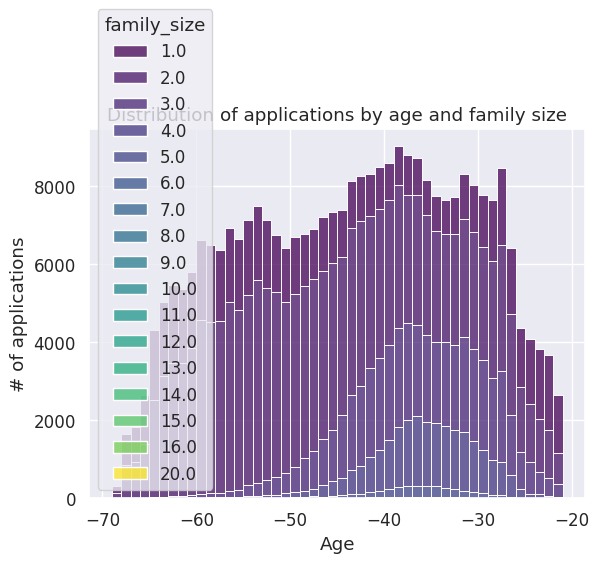

In [ ]:
# Filter data
data = application_train[(application_train["CODE_GENDER"] != "XNA") & (application_train["CNT_FAM_MEMBERS"] <= 4)]

# Group data
data_grouped = application_train.groupby([pd.Series(-np.round(application_train["DAYS_BIRTH"]/365)),
                             pd.Series(application_train["CNT_FAM_MEMBERS"])])

# Summarize data
data_summary = data_grouped.agg({"SK_ID_CURR": "count", "AMT_INCOME_TOTAL": "mean"}).reset_index()
data_summary.rename(columns={"DAYS_BIRTH": "age", "CNT_FAM_MEMBERS": "family_size",
                             "SK_ID_CURR": "count", "AMT_INCOME_TOTAL": "mean_income"}, inplace=True)
data_summary["age"] = -data_summary["age"]

# Plot data
sns.histplot(data=data_summary, x="age", weights="count", hue="family_size", multiple="stack", binwidth=1, palette="viridis")
plt.xlabel("Age")
plt.ylabel("# of applications")
plt.title("Distribution of applications by age and family size")
plt.show()

#### Education/ Occupation

In [ ]:
import plotly.express as px

In [ ]:
# Filter data
data = application_train.dropna(subset=["TARGET"])
data = application_train[application_train["CODE_GENDER"] != "XNA"]

# Group data
data_grouped = application_train.groupby(["NAME_EDUCATION_TYPE", "OCCUPATION_TYPE"]).agg({"SK_ID_CURR": "count", "TARGET": "mean"})

# Summarize data
data_summary = data_grouped.reset_index()
data_summary.rename(columns={"SK_ID_CURR": "count", "TARGET": "mean_target"}, inplace=True)
# Transform data
data_summary["mean_target"] = data_summary["mean_target"].clip(0, 0.15) * 100

# Plot data
fig = px.treemap(data_summary, path=["NAME_EDUCATION_TYPE", "OCCUPATION_TYPE"],
                 values="count", color="mean_target",
                 color_continuous_scale=px.colors.sequential.Reds,
                 range_color=(0, 15),
                 title="Average default rate by education/occupation",
                 labels={"count": "# of applications", "mean_target": "Average default rate (%)"})

fig.show()